# Predicting Heart Disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheather or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition 
In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI machine learning repository. :- https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. :- https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci/data

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features 

This is where you will get different information about each of the features in your data.
**Create data dictionary** 

* Age
* Sex : male : 1
* female : 0
* chest pain type
  -- 1: typical angina : -chest pain releated decrease blood supply to the heart.
  -- 2: atypical angina : chest pain not related to heart.
  -- 3: non-anginal pain : typically esophagel spasms(not releated to heart). 
  -- 4: asymptomatic : chest pain not showing sign of disease.
* resting blood pressure (in mm Hg on admission to the hospital
* serum cholestoral in mg/dl
* (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* resting electrocardiographic results 
  -- Value 0: normal
  -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exercise induced angina (1 = yes; 0 = no)
* Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
* It may feel like pressure or squeezing in your chest.
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with exercise(uncommon)
   * 1: Flatsloping: minimal change(typical healty heart)
   * 2: Downsloping: signs of unhealty heart
* vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy
* A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* Target : 0 No Heart disease
           1 Heart disease

## Preparing the tools 

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.


In [112]:
# Import all the tools we need

# Regular EDA (expolatory data analysis) and plotting libraries.
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from sikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Laod Data

In [12]:
df = pd.read_csv("heart-disease-project.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of our data?

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# Let's find out how many of each class are there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

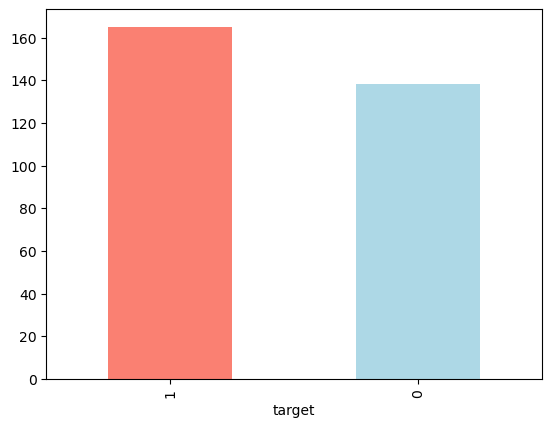

In [16]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"]);

In [17]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease according to Sex

In [21]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [23]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


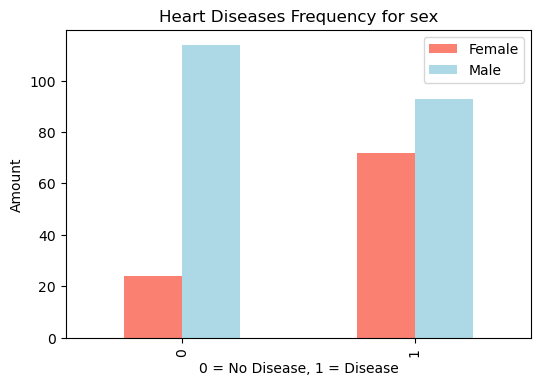

In [39]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar", 
                                    figsize = (6,4), 
                                    color = ["salmon","lightblue"]);
plt.title("Heart Diseases Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

## Age vs Max Heart Rate for Heart Disease

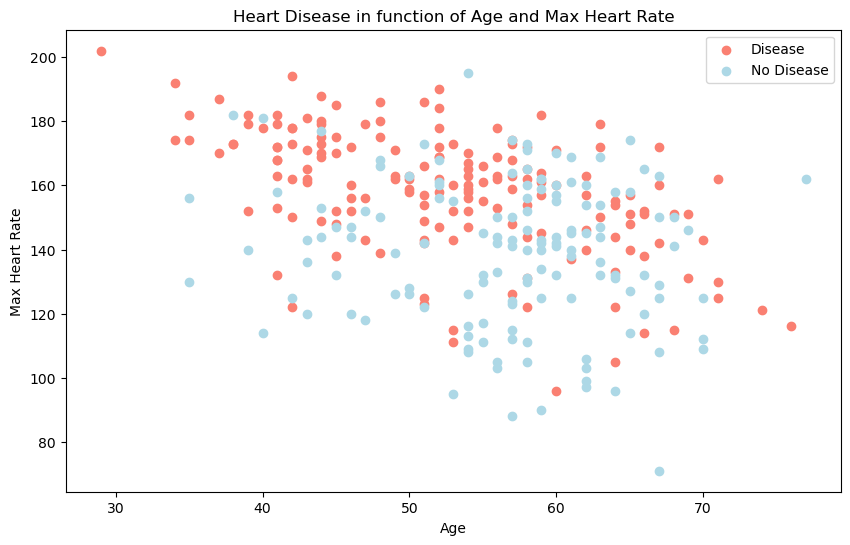

In [47]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c = ["salmon"]);

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = ["lightblue"])

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

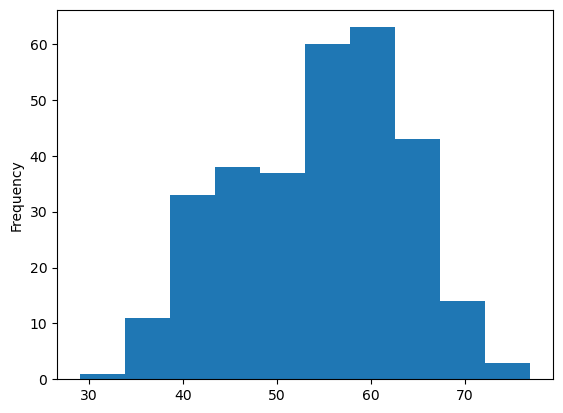

In [48]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease frequency per Chest Pain Type

chest pain type:- 

  * 0. Typical angina : -chest pain releated decrease blood supply to the heart.
  
  * 1. Atypical angina : chest pain not related to heart.
  
  * 2. Non-anginal pain : typically esophagel spasms(not releated to heart). 
  
  * 3. Asymptomatic : chest pain not showing sign of disease.

In [49]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


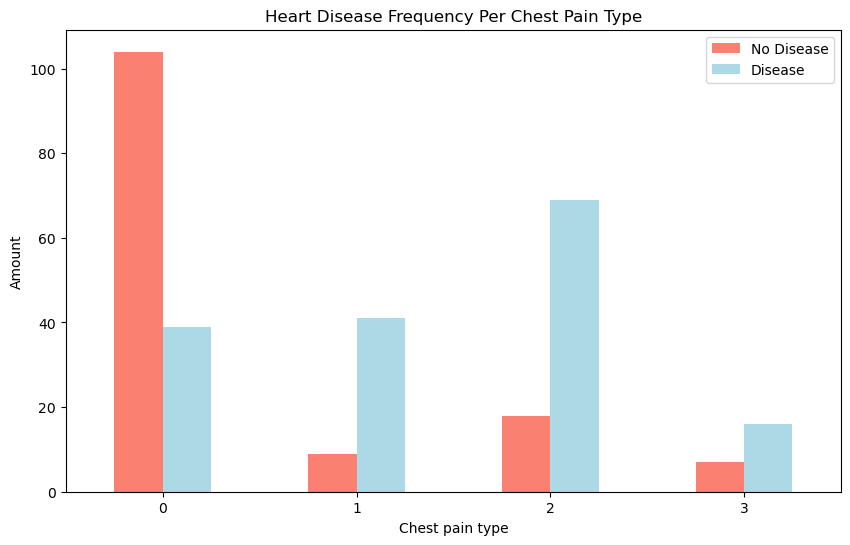

In [60]:
# Make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind ="bar",
                                   figsize = (10,6),
                                   color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [70]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


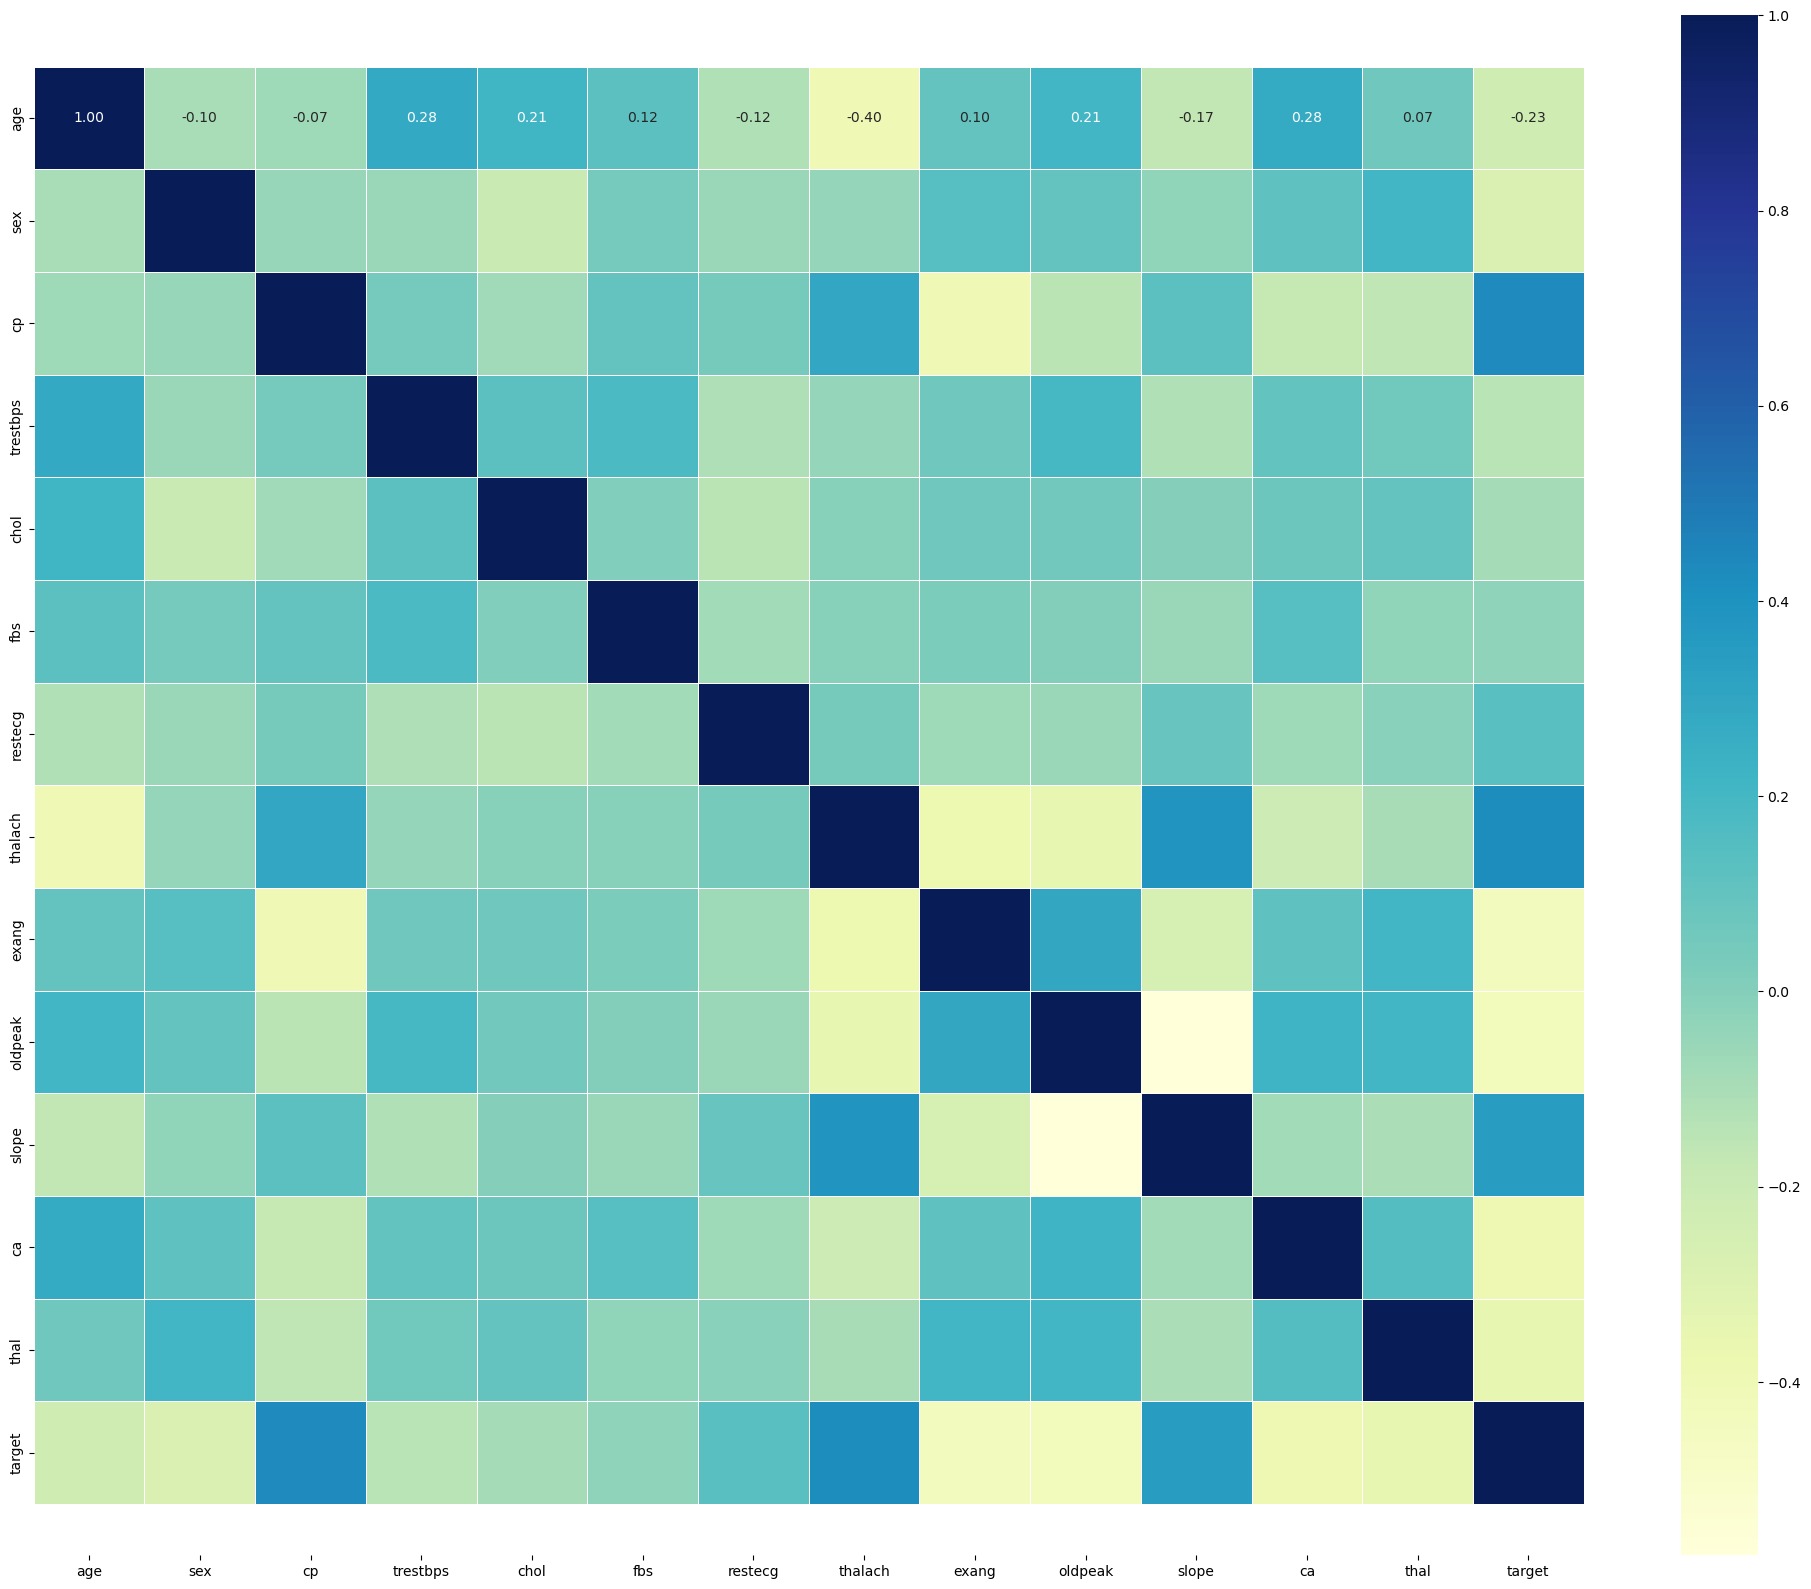

In [73]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,20))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top -0.5);

### 5. Modelling

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
# Split data into x and y
x = df.drop("target", axis =1)
y = df["target"]

In [77]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [78]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [79]:
# Split data into train and test set
np.random.seed(0)

# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [80]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [81]:
y_train, len(y_train)

(74     1
 153    1
 64     1
 296    0
 287    0
       ..
 251    0
 192    0
 117    1
 47     1
 172    0
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test set, it's time to build a machine learning model.

We'll train it(find the patterns) on the training set.

And we'll test it(use the patterns) on the test set.

We're going to try 3 different machine learning models:- 
 1. Logistic Regression
 2. Random Forest Classifier
 3. K-Nearest Neighbours Classifier

In [83]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    x_train : training data (no labels)
    x_test : test data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    
    # Set random seed
    np.random.seed(0)
    # Make a dictionary to keep model scores.
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [84]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train, 
                             y_test = y_test)
model_scores

C:\Users\The_Creater\Documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

## Model Comparison

<Axes: >

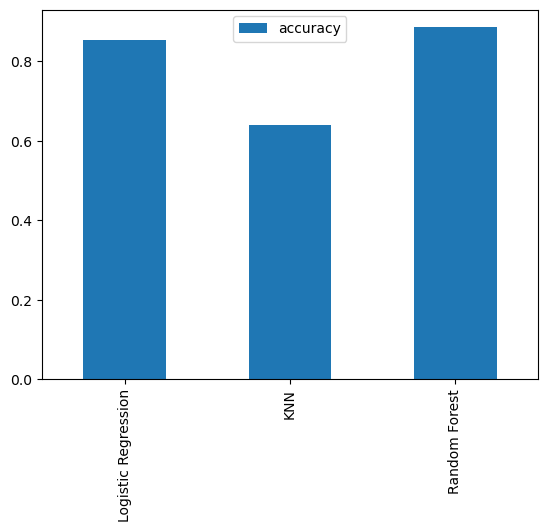

In [86]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar")

Now we've got a baseline model...and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following :-
* Hyperparameter Tuning*
* Feature Importance*
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning (by hand)

In [92]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm 
    knn.fit(x_train, y_train)
    
    # Update the training socre list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [90]:
train_scores

[1.0,
 0.7975206611570248,
 0.78099173553719,
 0.7603305785123967,
 0.78099173553719,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.6900826446280992,
 0.71900826446281,
 0.6859504132231405,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6818181818181818]

In [91]:
test_scores

[0.5245901639344263,
 0.6065573770491803,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.7213114754098361,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344]

Maximum KNN score on the test data:72.13%


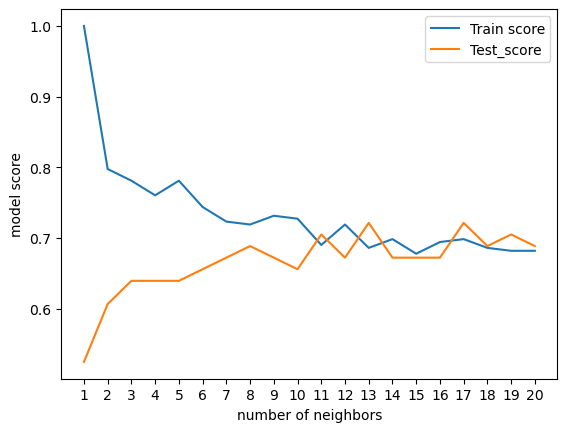

In [107]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test_score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

## Hyperparameter tunning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomizedSearchCV()

....using RandomizedSearchCV

In [119]:
# Create a hyperparaameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create hyperparameter for RandomizedForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [114]:
# Tune RandomizedSearchCV
np.random.seed(0)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [115]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [116]:
rs_log_reg.score(x_test, y_test)

0.8524590163934426

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [120]:
# Setup random seed
np.random.seed(0)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [121]:
# Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [122]:
# Evaluate the RandomizedSearchCV
rs_rf.score(x_test, y_test)

0.8524590163934426

## Hyperparameter tuning using GridSearchCV
Since our LogisticRegression() model is quiet good, we'll try and improve it using GridSearchCV

In [129]:
# Different Hyperparameters for our LogisticRegression() model
log_reg_grid = {"C": np.logspace(-4, 4, 40),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [130]:
 # Check the best parameter
gs_log_reg.best_params_

{'C': 0.7896522868499725, 'solver': 'liblinear'}

In [131]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8524590163934426

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used where possible

To make comparisons and evaluate our machine learning model, we first need to make predictions.

In [132]:
y_preds = gs_log_reg.predict(x_test)

In [133]:
y_preds

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

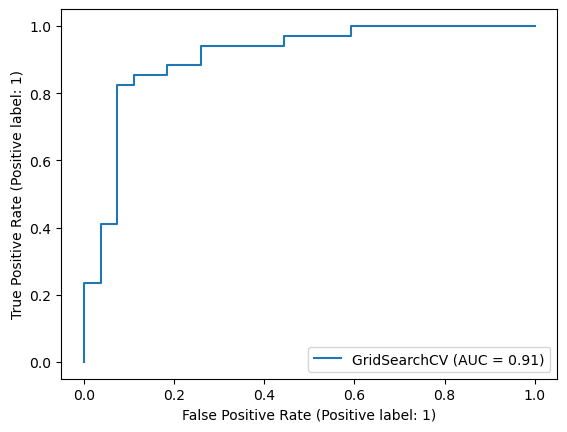

In [139]:
# Plot roc curve and calculate auc metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test);

In [140]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[22  5]
 [ 4 30]]


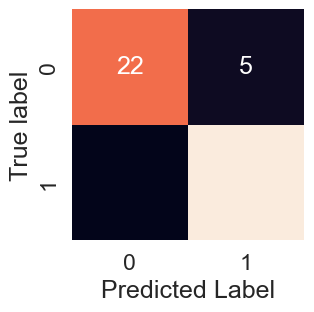

In [145]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    

plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall, f1-score.

In [146]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_score()'.

In [147]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.7896522868499725, 'solver': 'liblinear'}

In [148]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.7896522868499725,
                         solver='liblinear')

In [179]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, 
                         x, 
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [180]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8215300546448088

In [181]:
# Cross-validated precission
cv_precision = cross_val_score(clf,
                               x,
                               y, 
                               cv=5,
                               scoring= 'precision')
cv_precision

array([0.78947368, 0.90322581, 0.85294118, 0.83333333, 0.71052632])

In [182]:
cv_precision= np.mean(cv_precision)
cv_precision

0.817900063251107

In [183]:
# Cross-validated recall
cv_recall = cross_val_score(clf, 
                            x, 
                            y, 
                            cv=5,
                            scoring='recall')
cv_recall

array([0.90909091, 0.84848485, 0.87878788, 0.90909091, 0.81818182])

In [184]:
cv_recall=np.mean(cv_recall)
cv_recall

0.8727272727272727

In [185]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, 
                        x, 
                        y, 
                        cv=5,
                        scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8431741323998502

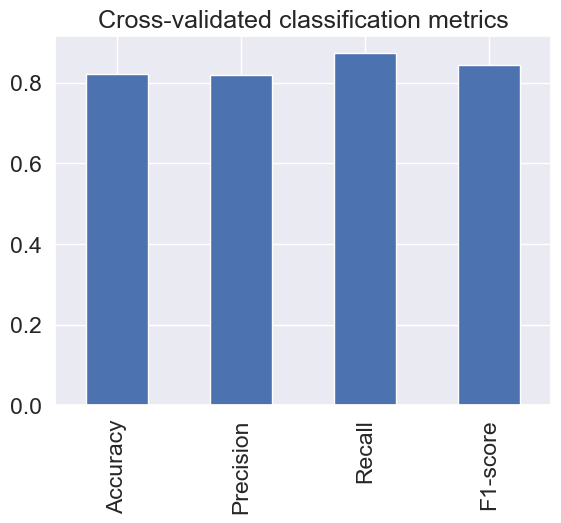

In [189]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend = False);

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is "(MODEL NAME) feature importance".

Let's find the feature importance for our Logistic Regression.

In [171]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [191]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.7896522868499725,
                         solver="liblinear")
clf.fit(x_train, y_train);

In [194]:
# Check coef 
clf.coef_ # it tells us which coeffient/label of our dataframe is contributing to predict our target label

array([[ 0.00678382, -1.44008647,  0.73173668, -0.00846284, -0.00363641,
        -0.30050214,  0.21721654,  0.02899069, -0.79770247, -0.53158121,
         0.20104772, -0.84151709, -0.66394634]])

In [195]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006783823387109583,
 'sex': -1.4400864727243385,
 'cp': 0.7317366772979411,
 'trestbps': -0.00846284061641785,
 'chol': -0.0036364056042799712,
 'fbs': -0.3005021373613147,
 'restecg': 0.21721654000864293,
 'thalach': 0.028990689114319193,
 'exang': -0.797702469003182,
 'oldpeak': -0.531581205083068,
 'slope': 0.2010477232723208,
 'ca': -0.8415170917341422,
 'thal': -0.663946343222494}

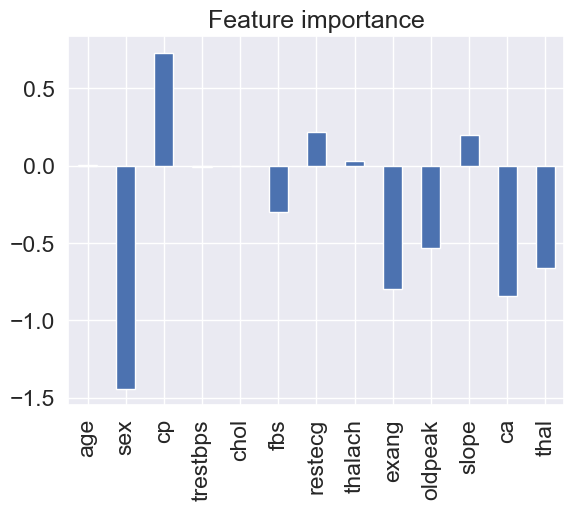

In [198]:
# Visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

In [199]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [200]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with exercise(uncommon)
* 1: Flatsloping: minimal change(typical healty heart)
* 2: Downsloping: signs of unhealty heart

## 6. Experimentation

If you haven't hit your evaluation metric yet...ask yourself...:

* Could you collect more data?
* Could you try a better model?Like *CatBoost or XGBoost?*
* Could you improve the current model? (beyond what we have done so far)
* If your current model is good enough (you have hit your evaluation metric) how would you export it and share it with your friends?